In [4]:
from PIL import Image
import numpy as np 
import matplotlib.pyplot as plt 

image_path = "E:/Tensorflow/Signal Processing/dataset/0.png"

image = Image.open(image_path)


image_array = np.array(image)
image_array

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

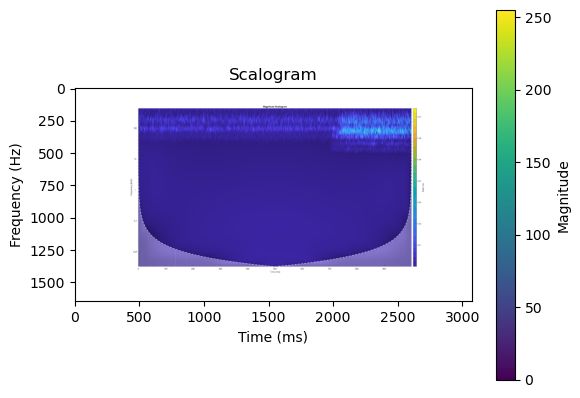

In [5]:
plt.imshow(image_array)
plt.title("Scalogram")
plt.xlabel('Time (ms)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label='Magnitude')
plt.show()

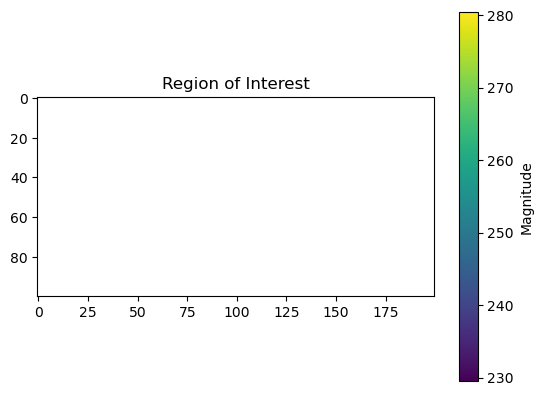

In [6]:
# Define the ROI (e.g., a specific frequency band over a certain time period)
roi = image_array[100:200, 200:400]  # Adjust indices based on your specific needs

# Visualize the ROI
plt.imshow(roi)
plt.title('Region of Interest')
plt.colorbar(label='Magnitude')
plt.show()


In [7]:
def extract_features(scalogram):
    features = {
        'mean': np.mean(scalogram),
        'std': np.std(scalogram),
        'max': np.max(scalogram),
        'min': np.min(scalogram),
        'sum': np.sum(scalogram)
    }
    return features

# Extract features from the ROI
features = extract_features(roi)
print(features)


{'mean': 255.0, 'std': 0.0, 'max': 255, 'min': 255, 'sum': 15300000}


In [8]:
threshold = np.mean(roi) + 2 * np.std(roi)
significant_regions = roi > threshold

plt.imshow(significant_regions, cmap='gray')
plt.title('Significant Regions')
plt.show()


ValueError: arrays must be of dtype byte, short, float32 or float64

<Figure size 640x480 with 1 Axes>

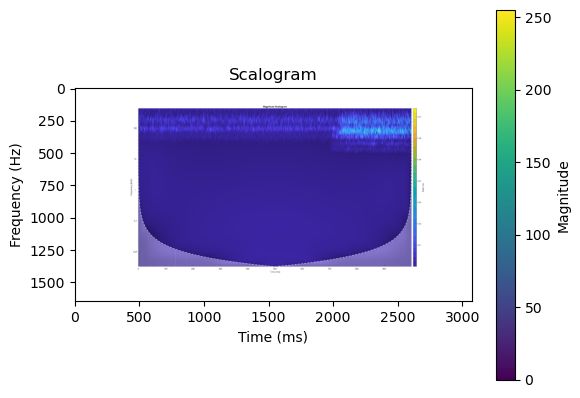

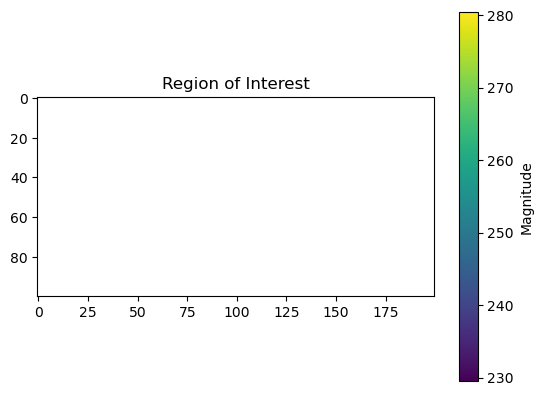

Extracted Features: {'mean': 255.0, 'std': 0.0, 'max': 255, 'min': 255, 'sum': 15300000}


ValueError: arrays must be of dtype byte, short, float32 or float64

<Figure size 640x480 with 1 Axes>

In [10]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "E:/Tensorflow/Signal Processing/dataset/0.png"
image = Image.open(image_path)

# Convert the image to a numpy array
image_array = np.array(image)

# Visualize the scalogram
plt.imshow(image_array)
plt.title('Scalogram')
plt.xlabel('Time (ms)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label='Magnitude')
plt.show()

# Define the ROI (adjust indices as needed)
roi = image_array[100:200, 200:400]

# Visualize the ROI
plt.imshow(roi)
plt.title('Region of Interest')
plt.colorbar(label='Magnitude')
plt.show()

# Extract features from the ROI
def extract_features(scalogram):
    features = {
        'mean': np.mean(scalogram),
        'std': np.std(scalogram),
        'max': np.max(scalogram),
        'min': np.min(scalogram),
        'sum': np.sum(scalogram)
    }
    return features

features = extract_features(roi)
print('Extracted Features:', features)

# Apply a threshold to identify significant regions
threshold = np.mean(roi) + 2 * np.std(roi)
significant_regions = roi > threshold

plt.imshow(significant_regions, cmap='gray')
plt.title('Significant Regions')
plt.show()


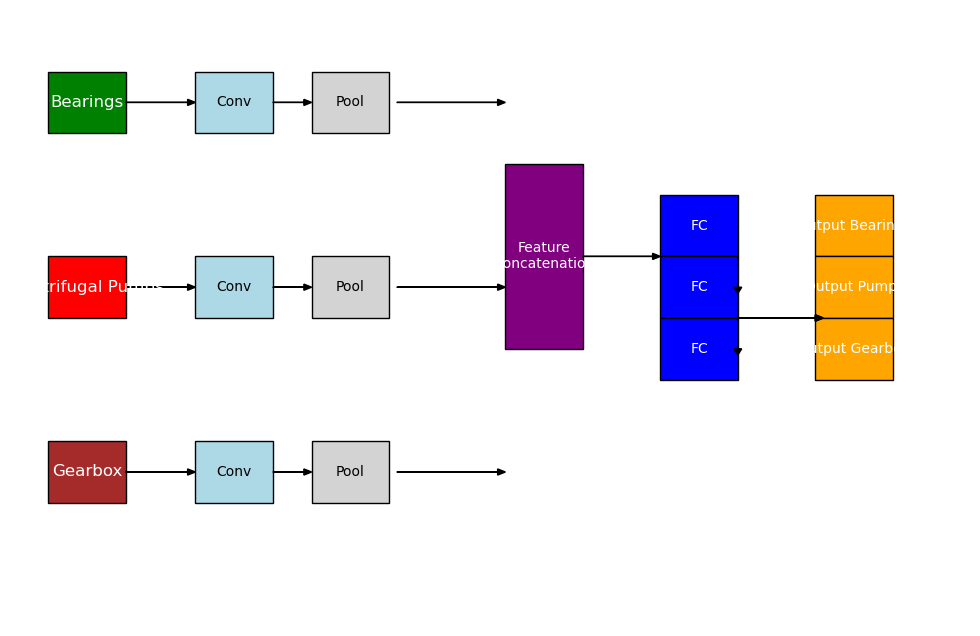

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create a new figure
fig, ax = plt.subplots(figsize=(12, 8))

# Colors for different datasets
colors = {
    'Bearings': 'green',
    'Centrifugal Pumps': 'red',
    'Gearbox': 'brown',
    'Feature Concatenation': 'purple',
    'Fully Connected': 'blue',
    'Output': 'orange'
}

# Input layers
input_layers = ['Bearings', 'Centrifugal Pumps', 'Gearbox']
y_positions = [8, 5, 2]

for y, label in zip(y_positions, input_layers):
    rect = patches.Rectangle((0.1, y), 1, 1, linewidth=1, edgecolor='black', facecolor=colors[label])
    ax.add_patch(rect)
    ax.text(0.6, y + 0.5, label, horizontalalignment='center', verticalalignment='center', fontsize=12, color='white')

# Convolution and Pooling layers
for y in y_positions:
    conv_rect = patches.Rectangle((2, y), 1, 1, linewidth=1, edgecolor='black', facecolor='lightblue')
    pool_rect = patches.Rectangle((3.5, y), 1, 1, linewidth=1, edgecolor='black', facecolor='lightgrey')
    ax.add_patch(conv_rect)
    ax.add_patch(pool_rect)
    ax.text(2.5, y + 0.5, 'Conv', horizontalalignment='center', verticalalignment='center', fontsize=10)
    ax.text(4, y + 0.5, 'Pool', horizontalalignment='center', verticalalignment='center', fontsize=10)

# Feature Concatenation
concat_rect = patches.Rectangle((6, 4.5), 1, 3, linewidth=1, edgecolor='black', facecolor=colors['Feature Concatenation'])
ax.add_patch(concat_rect)
ax.text(6.5, 6, 'Feature\nConcatenation', horizontalalignment='center', verticalalignment='center', fontsize=10, color='white')

# Fully Connected Layers
fc_layers_y = [6, 5, 4]
for y in fc_layers_y:
    fc_rect = patches.Rectangle((8, y), 1, 1, linewidth=1, edgecolor='black', facecolor=colors['Fully Connected'])
    ax.add_patch(fc_rect)
    ax.text(8.5, y + 0.5, 'FC', horizontalalignment='center', verticalalignment='center', fontsize=10, color='white')

# Output layers
output_labels = ['Output Bearings', 'Output Pumps', 'Output Gearbox']
output_y_positions = [6, 5, 4]
for y, label in zip(output_y_positions, output_labels):
    output_rect = patches.Rectangle((10, y), 1, 1, linewidth=1, edgecolor='black', facecolor=colors['Output'])
    ax.add_patch(output_rect)
    ax.text(10.5, y + 0.5, label, horizontalalignment='center', verticalalignment='center', fontsize=10, color='white')

# Arrows from inputs to convolutions
for y in y_positions:
    ax.arrow(1.1, y + 0.5, 0.8, 0, head_width=0.1, head_length=0.1, fc='black', ec='black')

# Arrows from convolutions to pooling
for y in y_positions:
    ax.arrow(3, y + 0.5, 0.4, 0, head_width=0.1, head_length=0.1, fc='black', ec='black')

# Arrows from pooling to concatenation
for y in y_positions:
    ax.arrow(4.6, y + 0.5, 1.3, 0, head_width=0.1, head_length=0.1, fc='black', ec='black')

# Arrow from concatenation to first fully connected layer
ax.arrow(7, 6, 0.9, 0, head_width=0.1, head_length=0.1, fc='black', ec='black')

# Arrows between fully connected layers
for y1, y2 in zip(fc_layers_y[:-1], fc_layers_y[1:]):
    ax.arrow(9, y1 + 0.5, 0, -1, head_width=0.1, head_length=0.1, fc='black', ec='black')

# Arrows from last fully connected layer to outputs
for y in output_y_positions:
    ax.arrow(9, 5, 1, 0, head_width=0.1, head_length=0.1, fc='black', ec='black')

# Adjust plot
ax.set_xlim(0, 12)
ax.set_ylim(0, 10)
ax.axis('off')

# Display plot
plt.show()
